In [1]:
# Kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
from collections import Counter
import http.server
import socketserver
import webbrowser
import threading
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df_ =  pd.read_excel("side_effect_data 1.xlsx")
df = df_.copy()

In [3]:
# EDA

In [4]:
# Veriye İlk Bakış
def summarize_dataframe(df, head_n=5, tail_n=5):
    """Veri çerçevesinin genel özetini sağlar: ilk ve son gözlemler, betimsel istatistikler, boyutlar ve bilgi."""

    # ---------------------------
    # İlk n gözlem
    # ---------------------------
    print('#' * 30)
    print(f'İlk {head_n} gözlem:')
    print(df.head(head_n))
    print('#' * 30)
    print()  # Satır sonu

    # ---------------------------
    # Son n gözlem
    # ---------------------------
    print('#' * 30)
    print(f'Son {tail_n} gözlem:')
    print(df.tail(tail_n))
    print('#' * 30)
    print()  # Satır sonu

    # ---------------------------
    # Betimsel istatistikler
    # ---------------------------
    print('#' * 30)
    print('Veri çerçevesinin betimsel istatistikleri:')
    print(df.describe().T)
    print('#' * 30)
    print()  # Satır sonu

    # ---------------------------
    # Veri çerçevesinin boyutu
    # ---------------------------
    print('#' * 30)
    print('Veri çerçevesinin boyutu:')
    print(df.shape)
    print('#' * 30)
    print()  # Satır sonu

    # ---------------------------
    # Veri çerçevesi hakkında bilgi
    # ---------------------------
    print('#' * 30)
    print('Veri çerçevesi hakkında bilgi:')
    print(df.info())
    print('#' * 30)
    print()  # Satır sonu

    # ---------------------------
    # Nan değerler hakkında bilgi
    # ---------------------------
    print('#' * 30)
    print('Nan Değerler hakkında bilgi:')
    print(df.isnull().sum())
    print('#' * 30)
    print()  # Satır sonu
summarize_dataframe(df)

##############################
İlk 5 gözlem:
   Kullanici_id Cinsiyet Dogum_Tarihi    Uyruk         Il                        Ilac_Adi Ilac_Baslangic_Tarihi Ilac_Bitis_Tarihi               Yan_Etki Yan_Etki_Bildirim_Tarihi Alerjilerim             Kronik Hastaliklarim  Baba Kronik Hastaliklari          Anne Kronik Hastaliklari    Kiz Kardes Kronik Hastaliklari Erkek Kardes Kronik Hastaliklari Kan Grubu      Kilo       Boy
0           107     Male   1960-03-01  Turkiye  Canakkale                 trifluoperazine            2022-01-09        2022-03-04               Kabizlik      2022-02-19 18:28:43       Ceviz  Hipertansiyon, Kan Hastaliklari      Guatr, Hipertansiyon                              KOAH  Kemik Erimesi, Kalp Hastaliklari             Kemik Erimesi, Guatr     B RH- 103.00000 191.00000
1           140     Male   1939-10-12  Turkiye    Trabzon                fluphenazine hcl            2022-01-09        2022-03-08              Yorgunluk      2022-02-03 20:48:17         Toz      

In [5]:
# Kategorik değişkenlerin analizi

def cat_summary(dataframe, col_name):
    # Kategorik değişkenin frekans ve yüzde özetini çıkarır
    summary_df = pd.DataFrame({col_name: dataframe[col_name].value_counts(dropna=False),
                               "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})
    print(summary_df)
    print("\n" + "-" * 50 + "\n")


for col in df.select_dtypes(include=['object']).columns:
    cat_summary(df, col)


        Cinsiyet    Ratio
Female       872 36.99618
NaN          778      NaN
Male         707 29.99576

--------------------------------------------------

         Uyruk     Ratio
Turkiye   2357 100.00000

--------------------------------------------------

            Il   Ratio
NaN        227     NaN
Adana      220 9.33390
Mersin     207 8.78235
Trabzon    195 8.27323
Canakkale  179 7.59440
Ankara     179 7.59440
Eskisehir  174 7.38227
Antalya    171 7.25499
Bursa      169 7.17013
Samsun     153 6.49130
Istanbul   144 6.10946
Izmir      121 5.13364
Malatya    109 4.62452
Kayseri    109 4.62452

--------------------------------------------------

                                                    Ilac_Adi   Ratio
chlordiazepoxide-amitriptyline                            29 1.23038
lurasidone                                                27 1.14552
hydrocortisone cream                                      27 1.14552
loxapine                                                  26 1.103

In [6]:
# Yaşı hesaplamak için yeni bir değişken oluşturma ve Dogum_Tarihi isimli değişkeni veriden kaldırma
today_date = dt.datetime(2024, 9, 18)
df["Yaş"] = (today_date - df["Dogum_Tarihi"]).dt.days // 365
df.drop("Dogum_Tarihi", inplace=True, axis=1)
df.head()


,Kullanici_id,Cinsiyet,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy,Yaş
0,107,Male,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.00000,191.00000,64
1,140,Male,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.00000,181.00000,84
2,2,Female,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.00000,158.00000,47
3,83,Male,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.00000,47
4,7,Female,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.00000,172.00000,48


In [7]:
# İlac kullanım süresini hesaplama
df["Ilac_kullanim_suresi(gun)"] = (df["Ilac_Bitis_Tarihi"] - df["Ilac_Baslangic_Tarihi"]).dt.days

# Yan etki ilaç kullanmaya başlandıktan kaç gün sonra başladı ? (Yan_Etki_Bildirim_Tarihi - Ilac_Baslangic_Tarihi)
df["Yan_etki_ne_zaman_basladi"] = (df["Yan_Etki_Bildirim_Tarihi"] - df["Ilac_Baslangic_Tarihi"]).dt.days

# Gereksiz değişkenlerin Silinmesi
df.drop(columns=["Ilac_Bitis_Tarihi", "Ilac_Baslangic_Tarihi", "Yan_Etki_Bildirim_Tarihi", "Kullanici_id"], inplace=True, axis=1)
df.head()


,Cinsiyet,Uyruk,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy,Yaş,Ilac_kullanim_suresi(gun),Yan_etki_ne_zaman_basladi
0,Male,Turkiye,Canakkale,trifluoperazine,Kabizlik,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.00000,191.00000,64,54,41
1,Male,Turkiye,Trabzon,fluphenazine hcl,Yorgunluk,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.00000,181.00000,84,58,25
2,Female,Turkiye,Canakkale,warfarin sodium,Carpinti,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.00000,158.00000,47,60,24
3,Male,Turkiye,Adana,valproic acid,Sinirlilik,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.00000,47,67,35
4,Female,Turkiye,Izmir,carbamazepine extended release,Agizda Farkli Bir Tat,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.00000,172.00000,48,52,30


In [8]:
# Eksik Veri 
def handle_missing_values(df):
    """
    Eksik değerlerle ilgili işlemleri yapan fonksiyon.

    Parametreler:
    df (pd.DataFrame): Eksik değerleri olan veri çerçevesi.

    Döndürür:
    pd.DataFrame: Eksik değerler doldurulmuş veri çerçevesi.
    """

    # Uyruk değişkenini veri setinden kaldır
    if 'Uyruk' in df.columns:
        df.drop(columns=["Uyruk"], axis=1, inplace=True)

    # Kategorik değişkenlerde eksik değerleri "Yok" ile doldur
    sutunlar = ["Alerjilerim", "Kronik Hastaliklarim", "Baba Kronik Hastaliklari",
                "Anne Kronik Hastaliklari", "Kiz Kardes Kronik Hastaliklari",
                "Erkek Kardes Kronik Hastaliklari"]

    df[sutunlar] = df[sutunlar].fillna("Yok")

    # Medyan hesaplama ve eksik değerleri medyan ile doldurma
    if 'Kilo' in df.columns:
        medyan_kilo = df['Kilo'].median()
        df['Kilo'].fillna(medyan_kilo, inplace=True)

    if 'Boy' in df.columns:
        medyan_boy = df['Boy'].median()
        df['Boy'].fillna(medyan_boy, inplace=True)

    # Eksik değerleri "Bilinmiyor" ile doldurma
    if 'Kan Grubu' in df.columns:
        df['Kan Grubu'].fillna('Bilinmiyor', inplace=True)

    if 'Il' in df.columns:
        df['Il'].fillna('Bilinmiyor', inplace=True)

    if 'Cinsiyet' in df.columns:
        df['Cinsiyet'].fillna('Bilinmiyor', inplace=True)

    return df

handle_missing_values(df)


,Cinsiyet,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy,Yaş,Ilac_kullanim_suresi(gun),Yan_etki_ne_zaman_basladi
0,Male,Canakkale,trifluoperazine,Kabizlik,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.00000,191.00000,64,54,41
1,Male,Trabzon,fluphenazine hcl,Yorgunluk,Toz,Yok,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",Bilinmiyor,81.00000,181.00000,84,58,25
2,Female,Canakkale,warfarin sodium,Carpinti,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.00000,158.00000,47,60,24
3,Male,Adana,valproic acid,Sinirlilik,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",Yok,Astim,"Kalp Hastaliklari, Kanser",AB RH-,83.00000,165.00000,47,67,35
4,Female,Izmir,carbamazepine extended release,Agizda Farkli Bir Tat,Yok,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.00000,172.00000,48,52,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,Bilinmiyor,Bilinmiyor,"desoximetasone spray, non-aerosol",Ishal,Ispanakgiller,Yok,,"Astim, Guatr",,"KOAH, Kan Hastaliklari",Bilinmiyor,50.00000,152.00000,67,50,30
2353,Female,Mersin,olanzapine-fluoxetine,Agizda Farkli Bir Tat,Istiridye,Yok,"Hipertansiyon, Astim","Astim, Kemik Erimesi","KOAH, Kan Hastaliklari","Astim, Diyabet",AB RH-,83.00000,178.00000,19,62,48
2354,Female,Mersin,trazodone,Yorgunluk,Deniz Urunler,"Guatr, KOAH","Alzheimer, Diger",Yok,"Astim, Diyabet","Kalp Hastaliklari, Diger",B RH+,90.00000,203.00000,72,69,32
2355,Male,Kayseri,duloxetine hydrochloride,Carpinti,Sari Kantaron,"Alzheimer, Diger",Yok,"Kalp Hastaliklari, Diger","Kanser, KOAH","Astim, KOAH",Bilinmiyor,90.00000,184.00000,44,65,33


In [9]:
############################################## Verilerin Görselleştirilmesi ##############################################

############################################## Plotly Express ##############################################

# Başlangıç port numarası
START_PORT = 8000
PORT_INCREMENT = 1

def get_next_port():
    """Bir sonraki port numarasını döndür."""
    global START_PORT
    port = START_PORT
    START_PORT += PORT_INCREMENT
    return port

def save_and_show_plot(fig, filename='grafik.html'):
    """Grafiği HTML dosyasına kaydet ve basit bir HTTP sunucusu ile göster."""
    fig.write_html(filename)

    # Port numarasını al
    PORT = get_next_port()
    Handler = http.server.SimpleHTTPRequestHandler

    def run_server():
        with socketserver.TCPServer(("", PORT), Handler) as httpd:
            print(f"Sunucu {PORT} portunda çalışıyor...")
            webbrowser.open(f'http://localhost:{PORT}/{filename}')
            httpd.serve_forever()

    # Sunucuyu ayrı bir thread'de çalıştır
    server_thread = threading.Thread(target=run_server)
    server_thread.start()
    server_thread.join()  # Sunucu kapanana kadar bekleyin

def plot_pie_chart(values, names, title):
    """Pasta grafiği çizen fonksiyon."""
    fig = px.pie(values=values, names=names, title=title)
    save_and_show_plot(fig, 'pie_chart.html')

def plot_bar_chart(x, y, title, x_title, y_title):
    """Çubuk grafiği çizen fonksiyon."""
    fig = px.bar(x=x, y=y, text_auto='.2s', title=title)
    fig.update_layout(xaxis_title=x_title, yaxis_title=y_title)
    save_and_show_plot(fig, 'bar_chart.html')

def plot_histogram(x, title):
    """Histogram çizen fonksiyon."""
    fig = px.histogram(x=x, title=title)
    save_and_show_plot(fig, 'histogram.html')

def visualize_data(df, chart_type):
    """Veri setine göre uygun grafiği çizen ana fonksiyon."""
    switch = {

        ############################################## Cinsiyet Değişkeni Görselleştirme ##############################################
        'Cinsiyet': lambda: plot_pie_chart(df['Cinsiyet'].value_counts().values,
                                           df['Cinsiyet'].value_counts().index,
                                           'Cinsiyet Dağılımı '),

        ############################################## Yaş Değişkeni Görselleştirme ##############################################
        'Yaş': lambda: plot_histogram(df['Yaş'], 'Yaş Dağılımı '),

        ############################################## İl Değişkeni Görselleştirme ##############################################
        'İl': lambda: plot_pie_chart(df['Il'].value_counts().values,
                                     df['Il'].value_counts().index,
                                     'İl Dağılımı '),

        ############################################## İlaç Değişkeni Görselleştirme ##############################################
        'İlaç': lambda: plot_bar_chart(df['Ilac_Adi'].value_counts().index,
                                       df['Ilac_Adi'].value_counts().values,
                                       'İlaçların Dağılımı',
                                       'İlaç Adı',
                                       'Adet'),

        ############################################## Yan Etki Değişkeni Görselleştirme ##############################################
        'Yan Etki': lambda: plot_pie_chart(df['Yan_Etki'].value_counts().values,
                                           df['Yan_Etki'].value_counts().index,
                                           'Yan Etki Dağılımı'),

        ############################################## Kronik Hastalık Değişkeni Görselleştirme ##############################################

        'Kronik Hastalık': lambda: plot_bar_chart(df['Kronik Hastaliklarim'].value_counts().index,
                                                 df['Kronik Hastaliklarim'].value_counts().values,
                                                 'Kronik Hastalık Dağılımı',
                                                 'Kronik Hastalık',
                                                 'Adet'),

        ############################################## Kronik Hastalık (Unique değerler ile ayrılmış) Değişkeni Görselleştirme ##############################################

        'Kronik Hastalık Ayrı': lambda: plot_pie_chart(pd.DataFrame(Counter(
            [item for sublist in df['Kronik Hastaliklarim'].fillna("Yok").str.split(", ")
             for item in sublist]).items(),
            columns=['Hastalik', 'Frekans']).sort_values('Frekans', ascending=False)['Frekans'].values,
            pd.DataFrame(Counter(
            [item for sublist in df['Kronik Hastaliklarim'].fillna("Yok").str.split(", ")
             for item in sublist]).items(),
            columns=['Hastalik', 'Frekans']).sort_values('Frekans', ascending=False)['Hastalik'].values,
            'Kronik Hastalıkların Dağılımı'),

        ############################################## Kilo Değişkeni Görselleştirme ##############################################
        'Kilo': lambda: plot_histogram(df['Kilo'], 'Kilo Dağılımı'),

        ############################################## Boy Değişkeni Görselleştirme ##############################################
        'Boy': lambda: plot_histogram(df['Boy'], 'Boy Dağılımı '),

        ############################################## Alerji Değişkeni Görselleştirme ##############################################
        'Alerji': lambda: plot_pie_chart(df['Alerjilerim'].value_counts().values,
                                         df['Alerjilerim'].value_counts().index,
                                         'Alerji Dağılımı'),


    }

    func = switch.get(chart_type)
    if func:
        func()
    else:
        print("Geçersiz grafik türü!")

# Örnek kullanım:
#visualize_data(df, 'Cinsiyet')  # Grafik türünü buraya belirtin. (Grafik çıktısı alındıktan sonra control+c ile port u kapatın!)


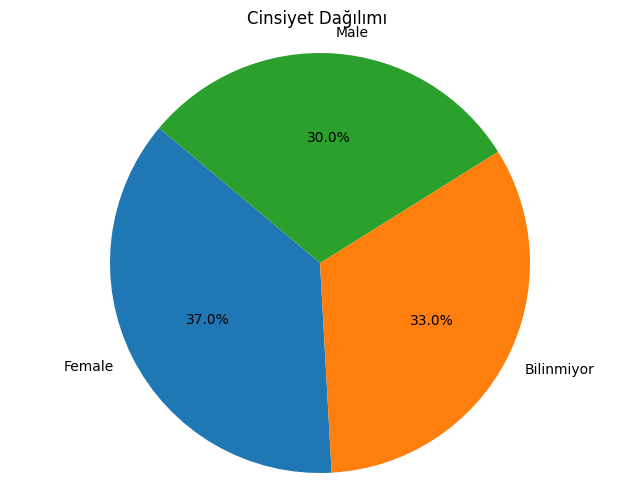

In [10]:
############################################## Matplotlib ##############################################
def plot_pie_chart(values, names, title):
    """Pasta grafiği çizen fonksiyon."""
    plt.figure(figsize=(8, 6))
    plt.pie(values, labels=names, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Eşit eksen oranı
    plt.show()

def plot_bar_chart(x, y, title, x_title, y_title):
    """Çubuk grafiği çizen fonksiyon."""
    plt.figure(figsize=(10, 6))
    plt.bar(x, y, color='skyblue')
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  # Etiketlerin kesilmesini önler
    plt.show()

def plot_histogram(x, title):
    """Histogram çizen fonksiyon."""
    plt.figure(figsize=(10, 6))
    plt.hist(x, bins=30, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Değerler')
    plt.ylabel('Frekans')
    plt.tight_layout()
    plt.show()

def visualize_data(df, chart_type):
    """Veri setine göre uygun grafiği çizen ana fonksiyon."""
    switch = {

        'Cinsiyet': lambda: plot_pie_chart(df['Cinsiyet'].value_counts().values,
                                           df['Cinsiyet'].value_counts().index,
                                           'Cinsiyet Dağılımı '),

        'Yaş': lambda: plot_histogram(df['Yaş'], 'Yaş Dağılımı '),

        'İl': lambda: plot_pie_chart(df['Il'].value_counts().values,
                                     df['Il'].value_counts().index,
                                     'İl Dağılımı '),

        'İlaç': lambda: plot_bar_chart(df['Ilac_Adi'].value_counts().index,
                                       df['Ilac_Adi'].value_counts().values,
                                       'İlaçların Dağılımı',
                                       'İlaç Adı',
                                       'Adet'),

        'Yan Etki': lambda: plot_pie_chart(df['Yan_Etki'].value_counts().values,
                                           df['Yan_Etki'].value_counts().index,
                                           'Yan Etki Dağılımı '),

        'Kronik Hastalık': lambda: plot_bar_chart(df['Kronik Hastaliklarim'].value_counts().index,
                                                 df['Kronik Hastaliklarim'].value_counts().values,
                                                 'Kronik Hastalık Dağılımı',
                                                 'Kronik Hastalık',
                                                 'Adet'),

        'Kronik Hastalık Ayrı': lambda: plot_pie_chart(pd.DataFrame(Counter(
            [item for sublist in df['Kronik Hastaliklarim'].fillna("Yok").str.split(", ")
             for item in sublist]).items(),
            columns=['Hastalik', 'Frekans']).sort_values('Frekans', ascending=False)['Frekans'].values,
            pd.DataFrame(Counter(
            [item for sublist in df['Kronik Hastaliklarim'].fillna("Yok").str.split(", ")
             for item in sublist]).items(),
            columns=['Hastalik', 'Frekans']).sort_values('Frekans', ascending=False)['Hastalik'].values,
            'Kronik Hastalıkların Dağılımı'),

        'Kilo': lambda: plot_histogram(df['Kilo'], 'Kilo Dağılımı '),

        'Boy': lambda: plot_histogram(df['Boy'], 'Boy Dağılımı'),

        'Alerji': lambda: plot_pie_chart(df['Alerjilerim'].value_counts().values,
                                         df['Alerjilerim'].value_counts().index,
                                         'Alerji Dağılımı')
    }

    func = switch.get(chart_type)
    if func:
        func()
    else:
        print("Geçersiz grafik türü!")

# Örnek kullanım:
visualize_data(df, 'Cinsiyet')  # Grafik türünü buraya belirtin.


In [11]:
# İlaç - Cinsiyet Kırılımında Ortalama Yaş, Ortalama Ilac Kullanim Suresi ve Ortalama Yan Etki Süresi
df.groupby(["Ilac_Adi", "Cinsiyet"]).agg({
    'Yaş': "mean",
    "Ilac_kullanim_suresi(gun)": "mean",
    "Yan_etki_ne_zaman_basladi": "mean"
})


Yaş  Ilac_kullanim_suresi(gun)  Yan_etki_ne_zaman_basladi
Ilac_Adi                    Cinsiyet                                                                 
Levomilnacipran             Bilinmiyor 52.62500                   61.87500                   33.62500
                            Female     52.71429                   65.28571                   38.28571
                            Male       53.77778                   65.88889                   33.22222
Mometasone furoate          Bilinmiyor 44.50000                   62.50000                   32.75000
                            Female     41.50000                   59.50000                   32.50000
...                                         ...                        ...                        ...
ziprasidone vial            Female     48.40000                   61.40000                   27.00000
                            Male       37.00000                   63.00000                   27.33333
zolpidem tablet, sublingual Bilinmiyor 53.25000                   65.75000                   34.87500
                            Female     57.66667                   64.66667                   35.16667
                            Male       63.66667                   56.00000                   33.66667

[451 rows x 3 columns]

In [12]:
# Cinsiyet - Yaş Kırılımında Ortalama Ilac Kullanim Suresi ve Ortalama Yan Etki Süresi
df.groupby(["Cinsiyet", "Yaş"]).agg({
    "Ilac_kullanim_suresi(gun)": "mean",
    "Yan_etki_ne_zaman_basladi": "mean"
})

Ilac_kullanim_suresi(gun)  Yan_etki_ne_zaman_basladi
Cinsiyet   Yaş                                                      
Bilinmiyor 13                    64.00000                   30.00000
           19                    60.14286                   38.00000
           20                    65.09091                   38.90909
           21                    62.50000                   34.33333
           22                    59.52381                   32.80952
...                                   ...                        ...
Male       78                    60.36000                   35.36000
           80                    61.16667                   34.41667
           81                    64.46154                   36.15385
           83                    60.57143                   35.14286
           84                    60.38095                   33.30952

[131 rows x 2 columns]

In [13]:
# Kan Grubu - Yaş - Kilo kırılımında  Ortalama Ilac Kullanim Suresi ve Ortalama Yan Etki Süresi
df.groupby(["Kan Grubu", "Yaş", "Kilo"]).agg({
    "Ilac_kullanim_suresi(gun)": "mean",
    "Yan_etki_ne_zaman_basladi": "mean"
})

Ilac_kullanim_suresi(gun)  Yan_etki_ne_zaman_basladi
Kan Grubu  Yaş Kilo                                                          
0 RH+      14  76.00000                   62.70000                   33.30000
           22  51.00000                   62.90909                   36.72727
           25  63.00000                   63.41667                   36.66667
               94.00000                   61.92857                   33.21429
           30  70.00000                   63.00000                   32.16667
...                                            ...                        ...
Bilinmiyor 72  56.00000                   61.08333                   34.75000
           78  85.00000                   61.00000                   35.37500
           83  82.00000                   62.90909                   36.27273
           84  57.00000                   61.18182                   36.72727
               81.00000                   61.11111                   34.38889

[194 rows x 2 columns]

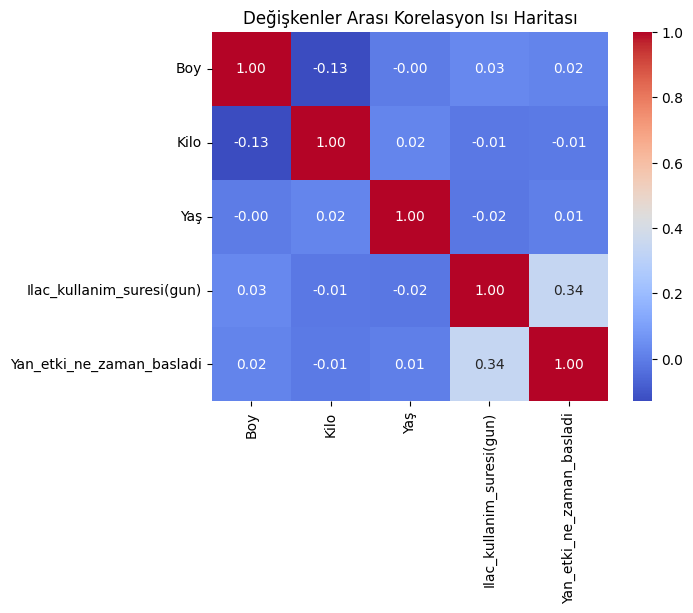

In [14]:
# Korelasyon Hesaplama
corr_matrix = df[["Boy", "Kilo", "Yaş", "Ilac_kullanim_suresi(gun)", "Yan_etki_ne_zaman_basladi"]].corr()

# Isı haritasını çiz
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Değişkenler Arası Korelasyon Isı Haritası")
plt.show()


In [15]:
# Sayısal Verileri Standartlaştırma
sayisal_degiskenler = ['Kilo', 'Boy', 'Yaş', 'Ilac_kullanim_suresi(gun)', 'Yan_etki_ne_zaman_basladi']

# MinMaxScaler'ı oluştur
scaler = MinMaxScaler()

# Sayısal verileri ölçeklendirme
df[sayisal_degiskenler] = scaler.fit_transform(df[sayisal_degiskenler])

df.head()


,Cinsiyet,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy,Yaş,Ilac_kullanim_suresi(gun),Yan_etki_ne_zaman_basladi
0,Male,Canakkale,trifluoperazine,Kabizlik,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,0.88333,0.79310,0.71831,0.23333,0.74194
1,Male,Trabzon,fluphenazine hcl,Yorgunluk,Toz,Yok,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",Bilinmiyor,0.51667,0.62069,1.00000,0.36667,0.22581
2,Female,Canakkale,warfarin sodium,Carpinti,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,0.71667,0.22414,0.47887,0.43333,0.19355
3,Male,Adana,valproic acid,Sinirlilik,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",Yok,Astim,"Kalp Hastaliklari, Kanser",AB RH-,0.55000,0.34483,0.47887,0.66667,0.54839
4,Female,Izmir,carbamazepine extended release,Agizda Farkli Bir Tat,Yok,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,0.81667,0.46552,0.49296,0.16667,0.38710


In [16]:
# Kategorik Değişkenleri Sayısal Değişkene Çevirme

# Label Encoder nesnesi oluşturma
label_encoders = {}

# Kategorik sütunları döngü ile dönüştürme
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[f'{column}_encoded'] = le.fit_transform(df[column])
    label_encoders[column] = le

df_encoded = df.drop(columns=df.select_dtypes(include=['object']).columns)

df_encoded.head()


,Kilo,Boy,Yaş,Ilac_kullanim_suresi(gun),Yan_etki_ne_zaman_basladi,Cinsiyet_encoded,Il_encoded,Ilac_Adi_encoded,Yan_Etki_encoded,Alerjilerim_encoded,Kronik Hastaliklarim_encoded,Baba Kronik Hastaliklari_encoded,Anne Kronik Hastaliklari_encoded,Kiz Kardes Kronik Hastaliklari_encoded,Erkek Kardes Kronik Hastaliklari_encoded,Kan Grubu_encoded
0,0.88333,0.79310,0.71831,0.23333,0.74194,2,5,138,12,3,34,32,43,82,85,7
1,0.51667,0.62069,1.00000,0.36667,0.22581,2,13,68,21,26,80,31,39,0,51,8
2,0.71667,0.22414,0.47887,0.43333,0.19355,1,5,146,4,22,49,25,81,24,17,7
3,0.55000,0.34483,0.47887,0.66667,0.54839,2,0,140,16,23,15,58,84,9,63,5
4,0.81667,0.46552,0.49296,0.16667,0.38710,1,8,26,0,28,19,6,67,20,4,5
